# **Credit Card Fraud Detection**

Credit card fraud refers to any unauthorized or fraudulent use of someone else's credit card information to make purchases or obtain funds. It is a criminal activity and a form of identity theft. Perpetrators may acquire credit card details through various means, such as phishing, skimming, hacking, or even stealing physical credit cards. 

Kaggle dataset has been used [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) which contains credit card transactions made by European cardholders. The dataset consists of 284,807 transactions, out of which 492 are fraudulent. The data contains only numerical input variables which are a result of Principal Component Analysis (PCA) transformations due to confidentiality issues. The features include 'Time', 'Amount', and 'V1' through 'V28', as well as the 'Class' variable, which is the target variable indicating whether the transaction is fraudulent (1) or not (0).

Starting with exploratory data analysis (EDA) to get a better understanding of the data. After that data processing and modeling, where we will build several classification models to predict fraudulent transactions. We will also address the issue of imbalanced classes by using undersampling. Finally, we will evaluate the performance of the models and choose the best one based on various evaluation metrics such as precision, recall, F1-score, and accuracy.

In [20]:
# Import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [21]:
# Set plot styles
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [22]:
# Loading the dataset
df = pd.read_csv('/data/creditcard.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/data/creditcard.csv'

# 1. Exploratory Data Analysis

In [ ]:
print(df.head())
df.sample(10)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
69701,53543.0,0.833473,-0.272712,0.217365,1.145561,-0.078564,0.430891,0.026297,0.215720,-0.229646,...,0.257524,0.486411,-0.178807,-0.275618,0.429694,-0.252592,0.018253,0.028516,144.00,0
169244,119595.0,-0.046708,1.064753,-2.460598,-0.666679,1.358995,-0.682754,1.720973,0.024561,-1.080923,...,0.596111,1.720077,0.158992,0.326283,-1.041737,0.363945,0.345284,0.321180,101.77,0
29912,35691.0,1.213083,0.300105,0.276187,0.644382,-0.192197,-0.604918,0.003401,-0.060558,0.041198,...,-0.260928,-0.722266,0.159837,0.031676,0.140508,0.124394,-0.007126,0.027235,1.79,0
210699,138090.0,-3.840572,3.927478,-2.085504,-1.541342,0.285541,-0.935855,1.167921,-0.177698,3.504515,...,-1.055724,-1.009688,0.153623,0.439438,0.286745,-0.002533,0.347913,-0.599655,8.99,0
215126,139948.0,-1.443568,0.546939,0.268917,-1.179912,1.559546,-1.762901,1.478003,-0.603127,0.100783,...,0.149666,0.777923,-0.409748,-0.004212,0.667503,-0.307039,-0.118391,0.127621,43.16,0
201999,134128.0,1.813306,-0.452000,-0.225428,1.299214,-0.794160,-0.317158,-0.623052,0.158703,0.894311,...,0.292316,0.770353,0.114772,0.017443,-0.207561,-0.586403,0.032889,-0.034159,55.00,0
260878,159762.0,1.925515,0.125408,-1.885162,1.307117,0.487744,-1.402756,0.882208,-0.511203,-0.107754,...,0.165747,0.425282,-0.064596,-0.019398,0.420677,-0.487572,-0.044458,-0.052429,74.97,0
156414,108081.0,1.973661,-0.105638,-0.134277,0.537546,-0.529935,-0.685512,-0.469224,-0.218688,2.458700,...,-0.245771,-0.288010,0.351447,-0.106157,-0.375899,-0.963968,0.040350,-0.029993,11.27,0
98870,66851.0,1.021558,0.221245,1.015514,2.309577,-0.155368,0.938874,-0.535451,0.462957,-0.594918,...,0.242733,0.670970,-0.005321,-0.309802,0.227750,0.141417,0.035831,0.012025,10.59,0
8064,11007.0,1.217259,-0.131945,0.526706,0.034124,-0.381167,-0.030908,-0.513481,-0.020091,1.503540,...,-0.053034,0.032583,-0.152759,-0.473935,0.284595,1.062048,-0.097460,-0.008360,39.00,0


We can only work with three non-transformed variables which are **Time, Amount, and Class** *(where Class takes values of 1 for fraud and 0 for not fraud)* as prescribed in dataset description.

In [ ]:
# printing data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Showing five point summary for Time and Amount columns
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


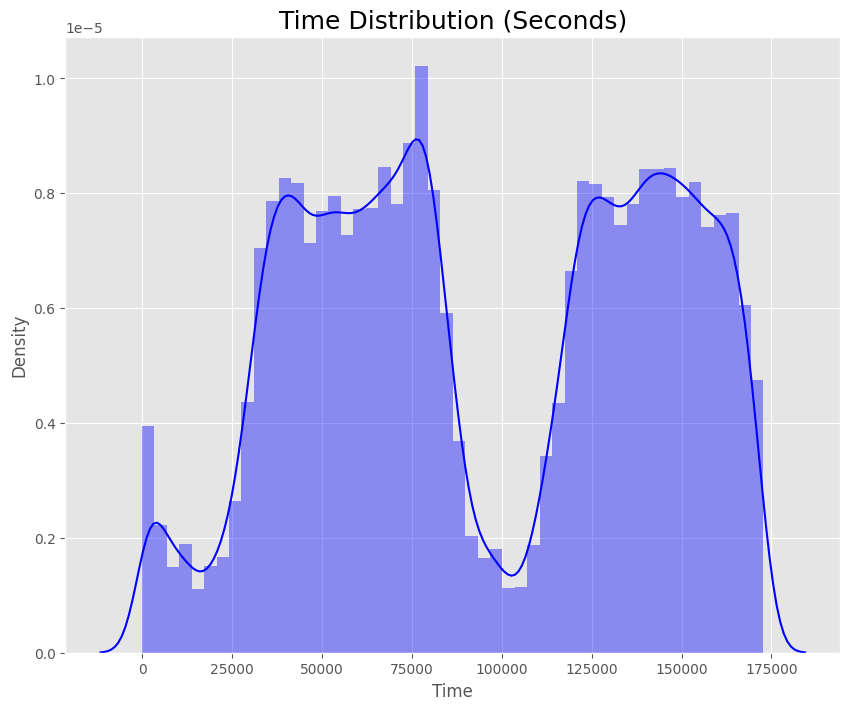

In [ ]:
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='blue')
plt.savefig('time-plot.png')

From the plot, we can observe that the `Time` feature has a bimodal distribution with two peaks, indicating that there are two periods during the day when credit card transactions are more frequent. The first peak occurs at around 50,000 seconds (approximately 14 hours), while the second peak occurs at around 120,000 seconds (approximately 33 hours). This suggests that there may be a pattern in the timing of credit card transactions that could be useful for fraud detection.

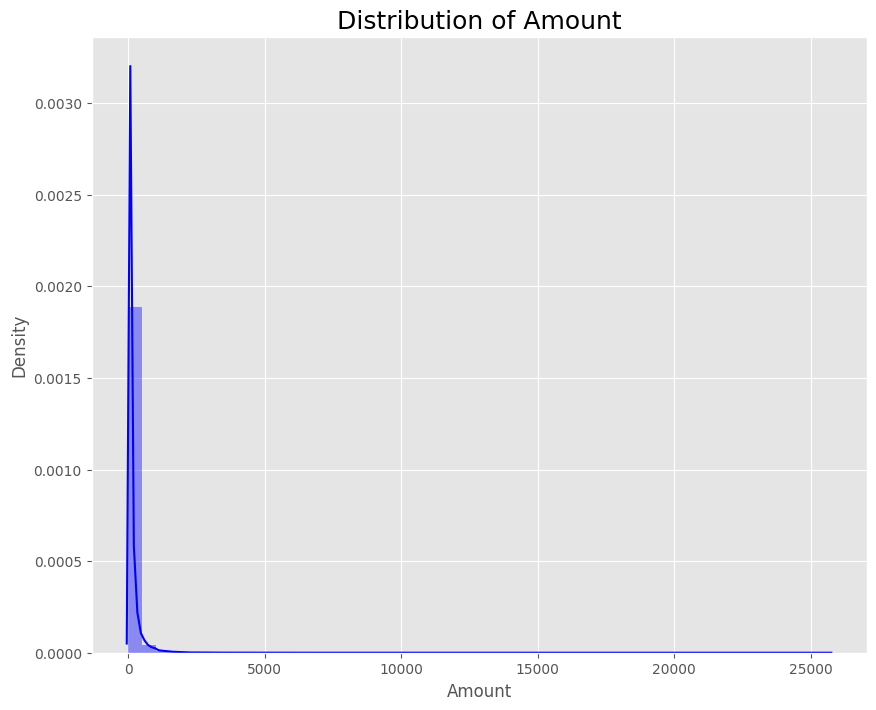

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='blue')
plt.savefig('amount-plot.png')

From the plot, we can observe that the distribution of the Amount feature is highly skewed to the right, with a long tail to the right. This indicates that the majority of the transactions have low amounts, while a few transactions have extremely high amounts. This suggests that the dataset contains some outliers in terms of transaction amounts. Therefore, when building a model for fraud detection, it may be necessary to handle outliers in the `Amount` feature, for instance, by using a log transformation or robust statistical methods.

In [ ]:
# Finding ratio of Fraud vs Non-Fraud transactions
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Ratio of fraud to non-fraud: 492/284315 (0.173%)


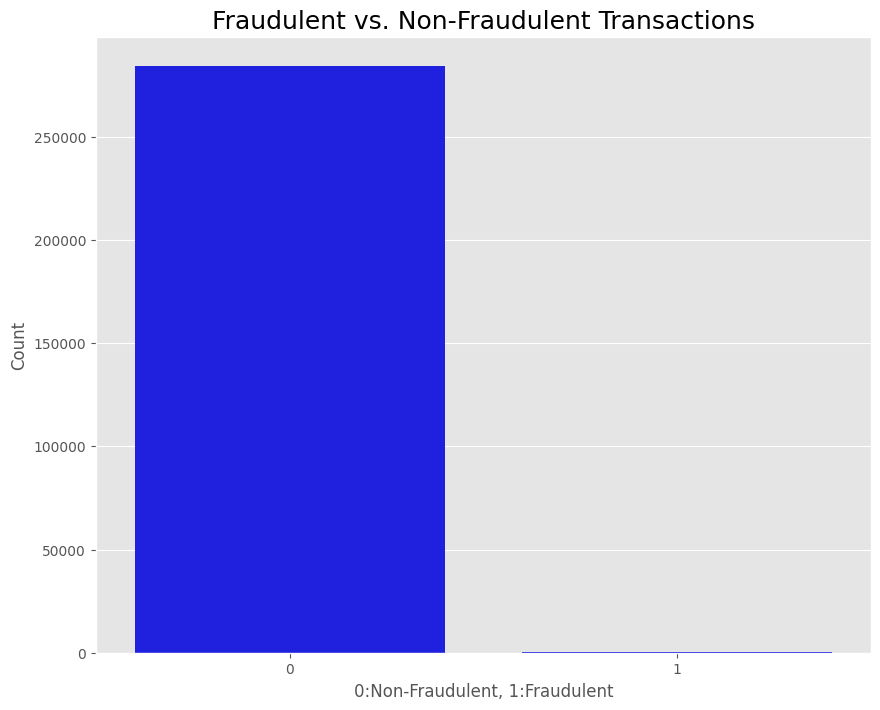

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts(), color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')
plt.savefig('fraud-vs-non-fraud.png')

It can be observed that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

# Data Processing

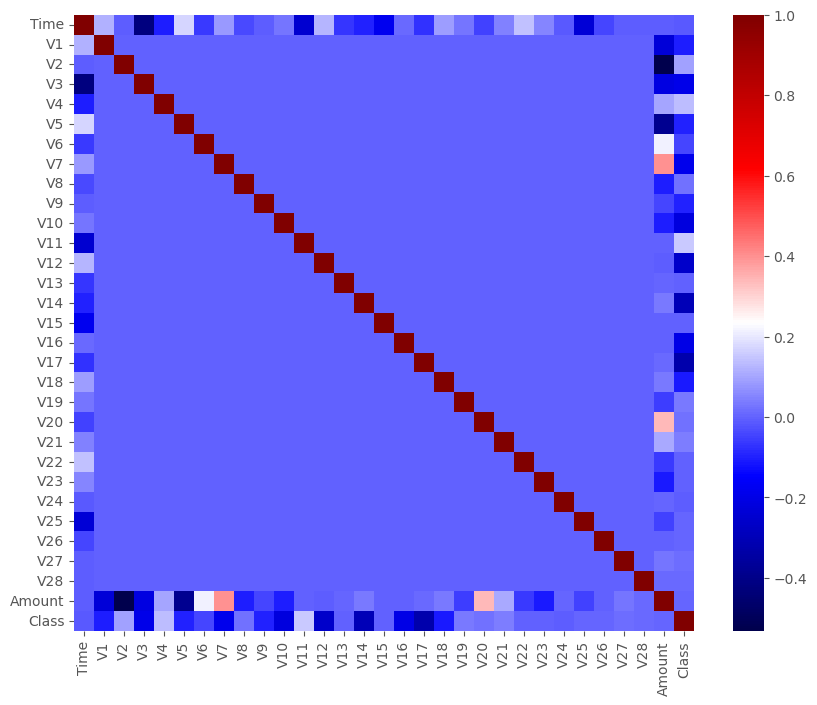

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting heatmap to find any high correlations between variables
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), cmap="seismic", annot=False)
plt.show()
plt.savefig('corr_heatmap.png');

From the heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations are found:
* Time and V3, with a correlation coefficient of -0.42
* Amount and V2, with a correlation coefficient of -0.53
* Amount and V4, with a correlation coefficient of 0.4. 

Although these correlations are relatively high, the risk of multicollinearity is not expected to be significant. 
Overall, the heatmap suggests that there are no highly correlated variables that need to be removed before building a machine learning model.

# Modeling

In [ ]:
# Drop the 'Class' column to prepare data for splitting
data = df.drop(columns=['Class'])

# Get the target variable
answer = df['Class']

In [ ]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
X_trainval, X_test, y_trainval, y_test = train_test_split(data, answer
                                                          , test_size=0.2
                                                          , stratify=df['Class']
                                                          , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
                                                  , test_size=0.25
                                                  , stratify=y_trainval
                                                  , random_state=42)

# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training, validation, and test sets using the scaler
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

In [ ]:
# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the training set
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)

# Undersample the validation set
X_val_under, y_val_under = rus.fit_resample(X_val_std, y_val)

### Logistic Regression

In [ ]:
# Logistic Regression
# Run CV with 5 folds (logit)
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 4/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 1/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 2/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 3/5; 1/10] END ...........C=1.0, penalty=l2;, score=1.000 total time=   0.0s[CV 2/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.983 total time=   0.0s[CV 1/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.994 total time=   0.0s

[CV 4/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.948 total time=   0.0s

[CV 5/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 1/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 2/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 3/5; 2/10] START C=21.544346900318832, penal

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

### Support Vector Machine (SVM)

In [ ]:
# # Support Vector Machine (SVM)
# # Run CV with 5 folds (SVM)
C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)

svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START C=1, gamma=0.001............................................
[CV 2/5; 1/2] START C=1, gamma=0.001............................................
[CV 3/5; 1/2] START C=1, gamma=0.001............................................
[CV 4/5; 1/2] START C=1, gamma=0.001............................................
[CV 3/5; 1/2] END .............C=1, gamma=0.001;, score=0.999 total time=   0.0s
[CV 5/5; 1/2] START C=1, gamma=0.001............................................
[CV 1/5; 1/2] END .............C=1, gamma=0.001;, score=0.989 total time=   0.1s
[CV 1/5; 2/2] START C=1, gamma=0.1..............................................
[CV 2/5; 1/2] END .............C=1, gamma=0.001;, score=0.988 total time=   0.1s
[CV 4/5; 1/2] END .............C=1, gamma=0.001;, score=0.947 total time=   0.1s
[CV 2/5; 2/2] START C=1, gamma=0.1..............................................
[CV 3/5; 2/2] START C=1, gamma=0.1...............

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

### Naive Bayes

In [34]:
# Naive Bayes
# Fit a Naive Bayes Model
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

### Random Forest

In [ ]:
# Random Forest
# Run CV with 5 folds (Random Forest)
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 2/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 3/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 4/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 1/5; 1/24] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.987 total time=   2.6s
[CV 5/5; 1/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500
[CV 2/5; 1/24] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.978 total time=   2.6s
[CV 1/5; 2/24] START max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

### Dummy Classifier

In [ ]:
# Dummy Classifier
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier()

# Model Evaluation

In [ ]:
def plot_roc_curves(X, y, models, model_names, figsize=(20,18)):
    """
    Plots ROC curves for a list of models.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): input features for the models
    y (numpy.ndarray or pandas.DataFrame): target variable
    models (list): list of models to compare
    model_names (list): list of model names to display on the plot
    figsize (tuple): size of the figure to display the plot

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        y_pred = list(model.predict_proba(X)[:, 1])
        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)

    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=30, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc='lower right', prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.xlabel('False Positive Rate', fontsize=30)
#     plt.show()

In [35]:
# Defining the list of models to compare
models = [logistic_grid.best_estimator_, svm_grid, gnb_best, rf_grid.best_estimator_, dummy]
model_names = ['Logit', 'SVM', 'Naive Bayes', 'Random Forest', 'Dummy']

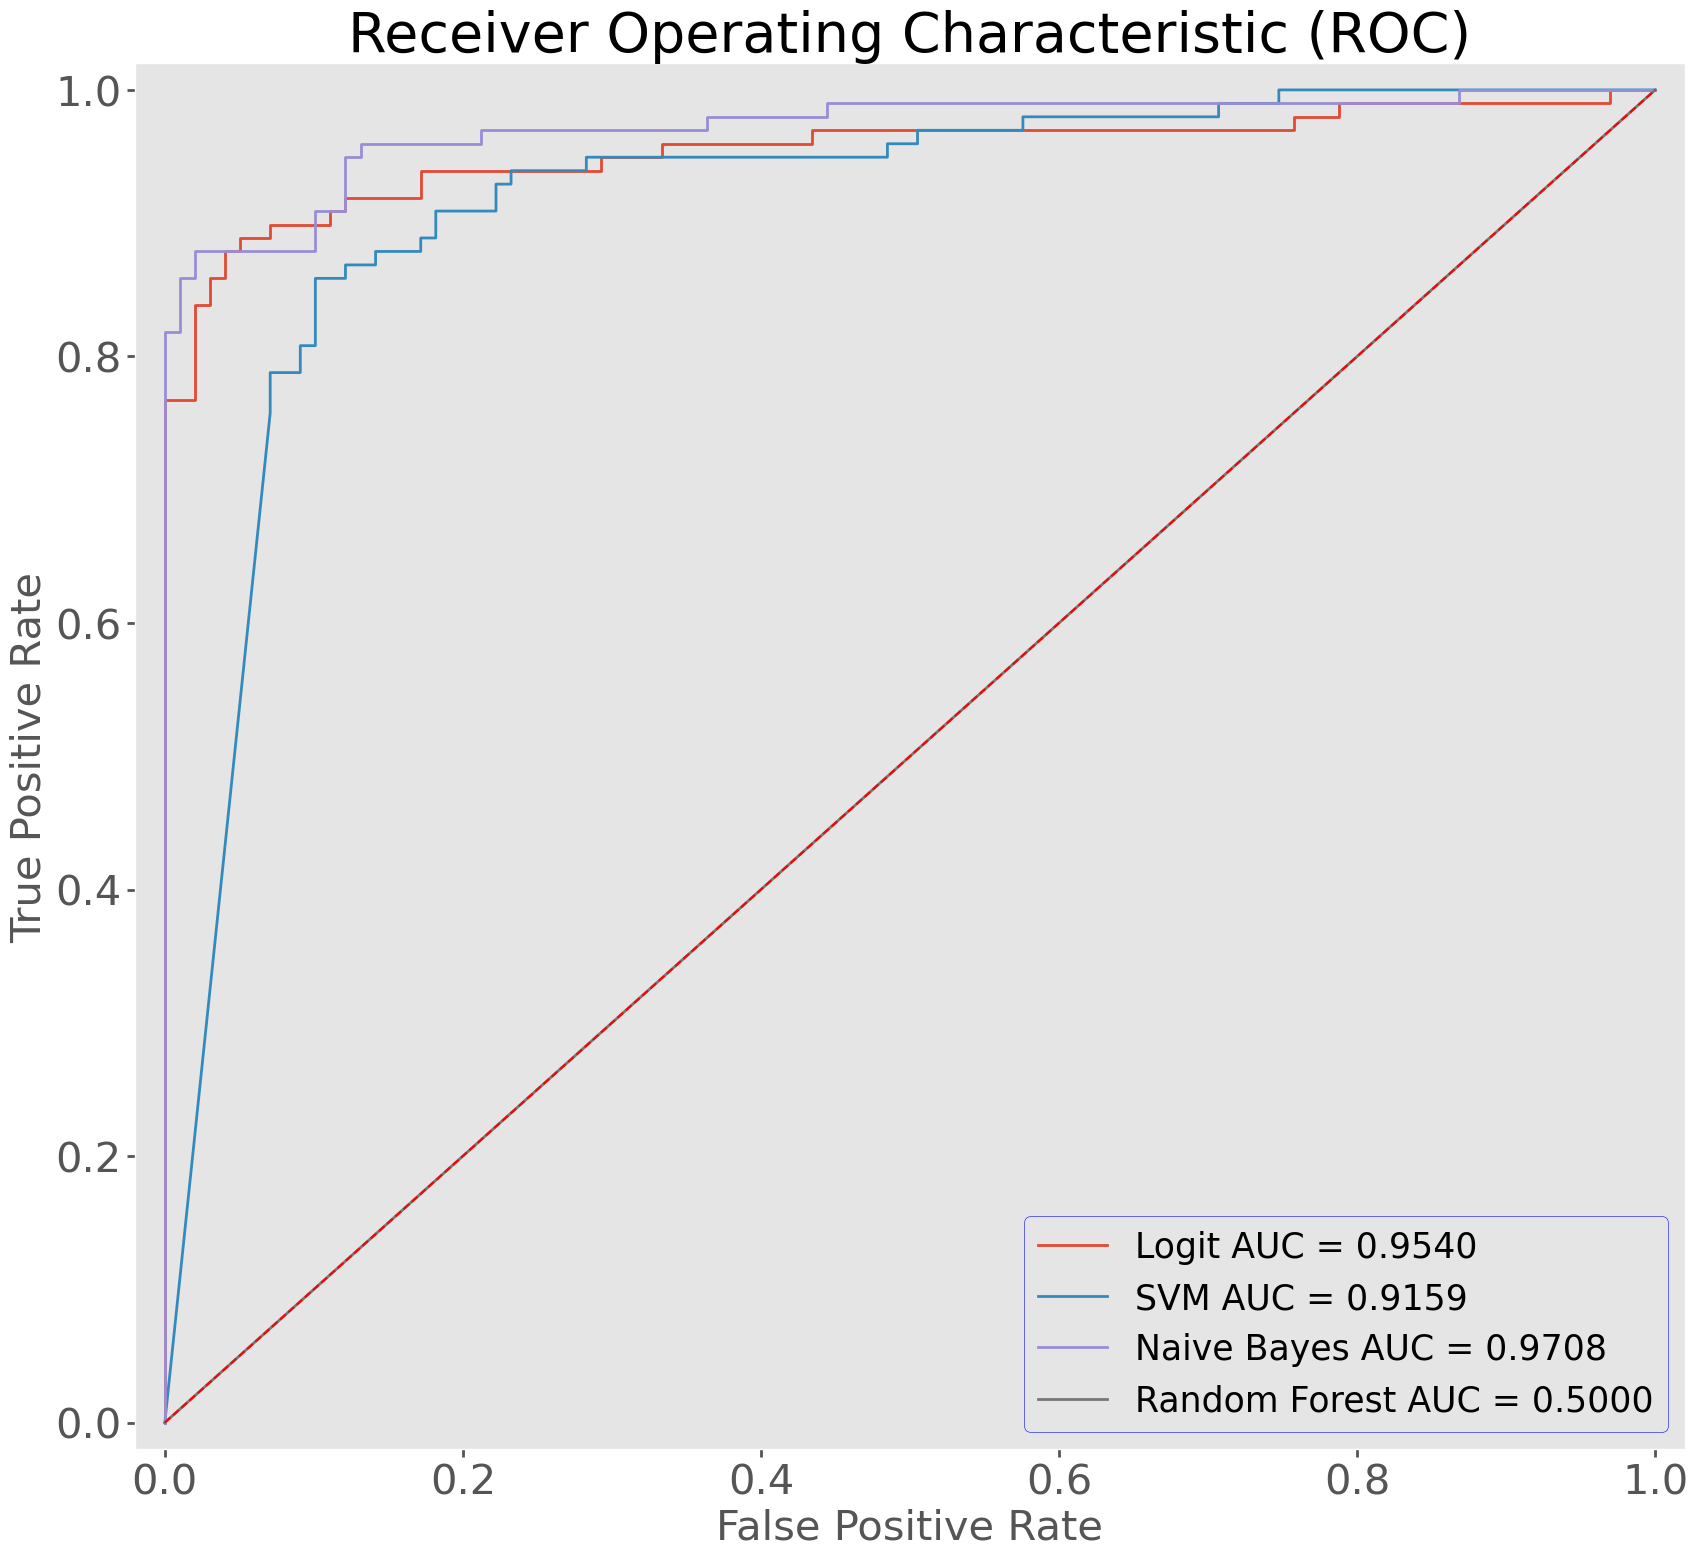

In [ ]:
# Plot ROC curves for in-sample data
plot_roc_curves(X_val_under, y_val_under, models, model_names)
plt.savefig('roc-insample.png');

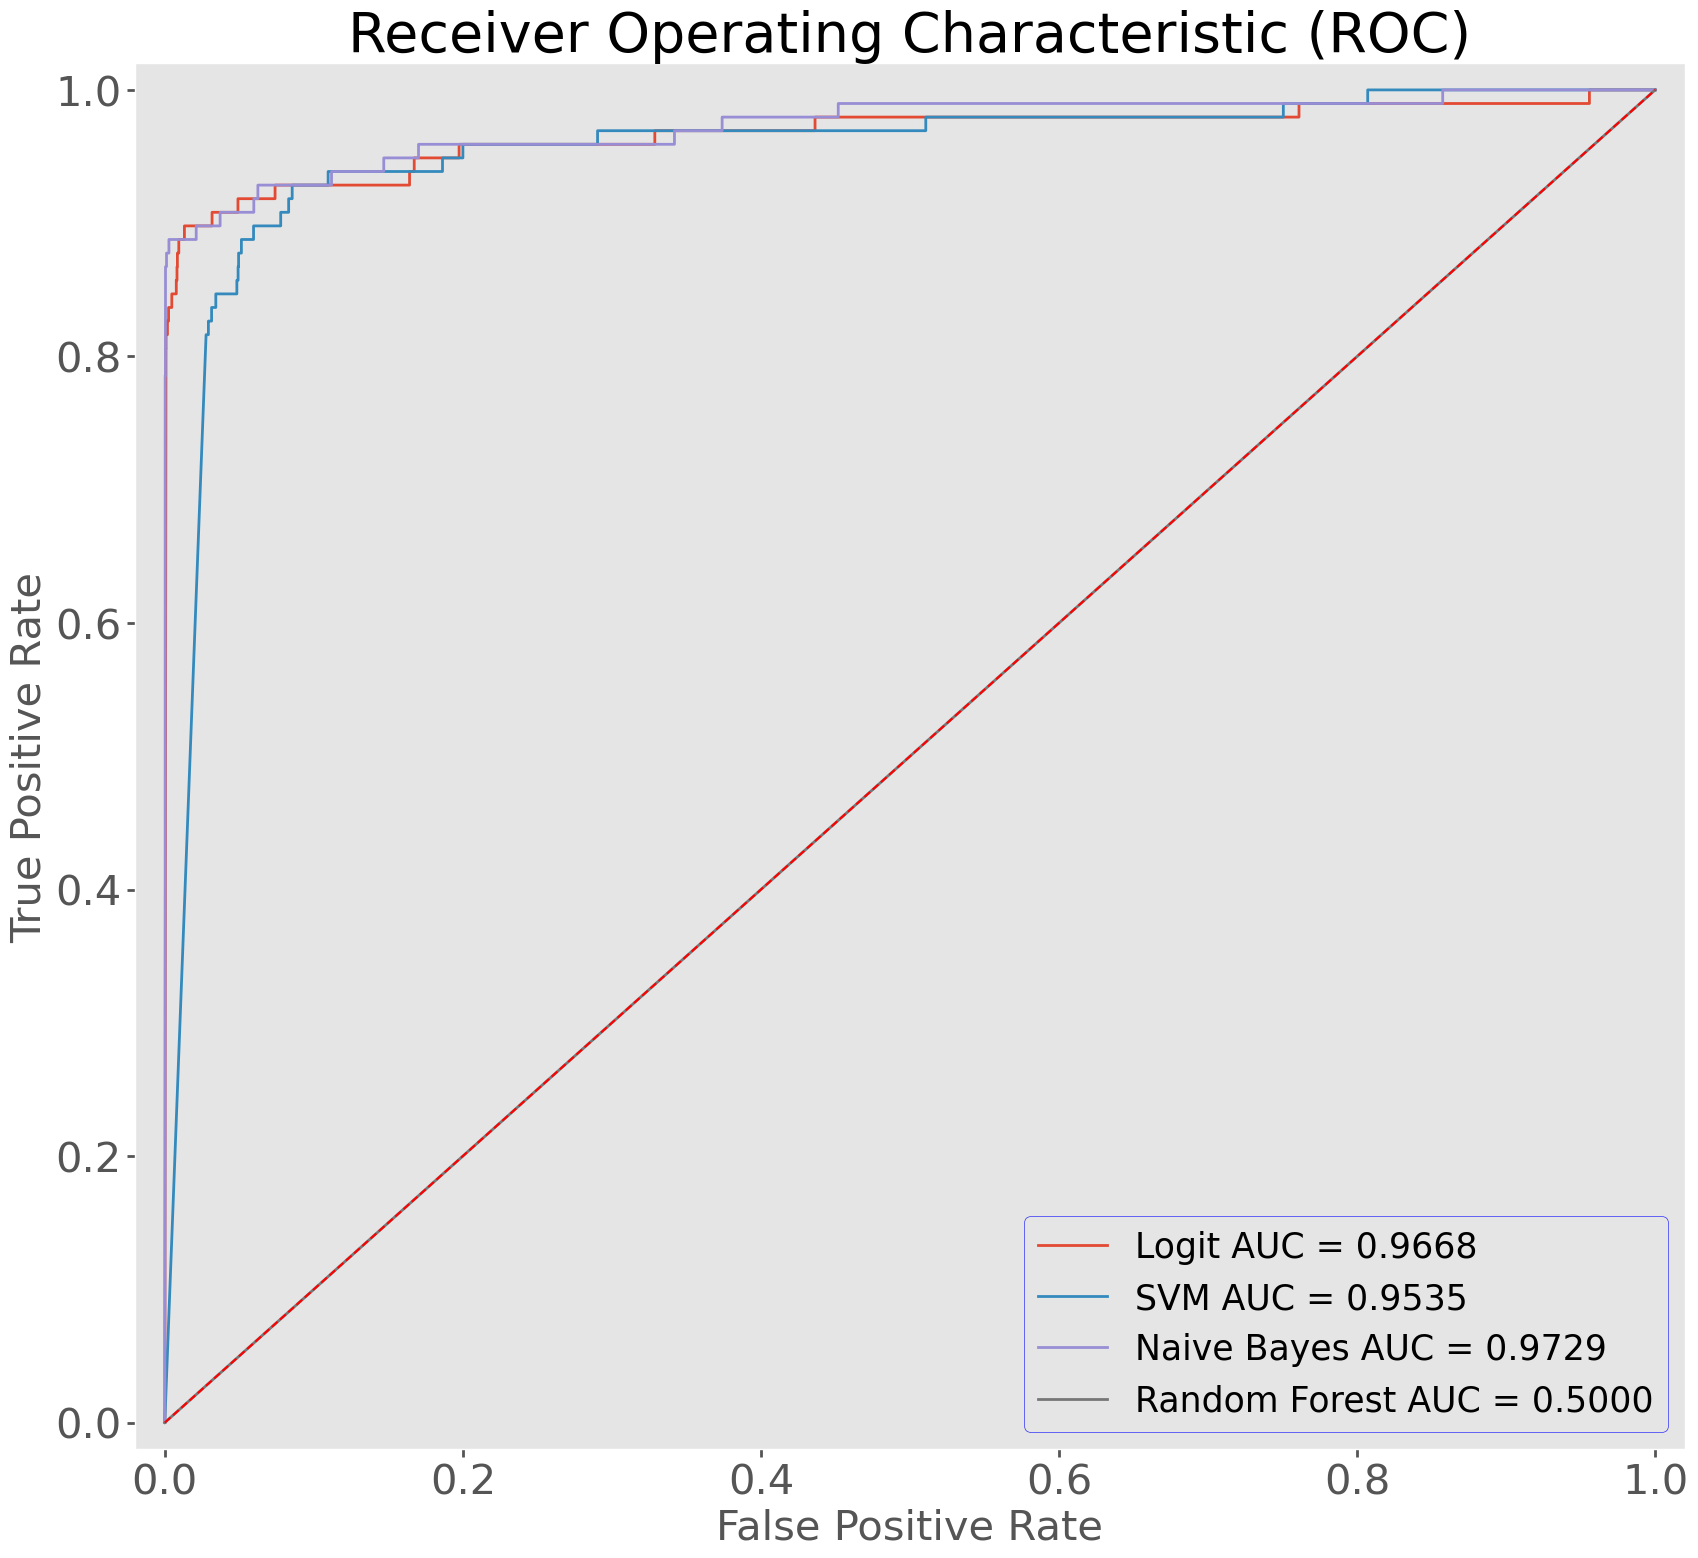

In [ ]:
# Plot ROC curves for out-of-sample data
plot_roc_curves(X_test_std, y_test, models, model_names)
plt.savefig('roc-outsample.png');

### Confusion Matrices

In [25]:
def make_confusion_matrix_val(model, threshold=0.5):
    """
    Create a confusion matrix plot for the given model and threshold. 
    
    Parameters:
    -----------
    model : sklearn classifier
        The classification model to evaluate.
    threshold : float, default=0.5
        Probability threshold for binary classification.
        
    Returns:
    --------
    None
    
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
    
    # calculate the confusion matrix
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    
    # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    
    # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    
    # rotate y-axis ticks
    plt.yticks(rotation = 0)
    
    # set plot title, x and y labels
    plt.title('Predicted vs. Actual',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

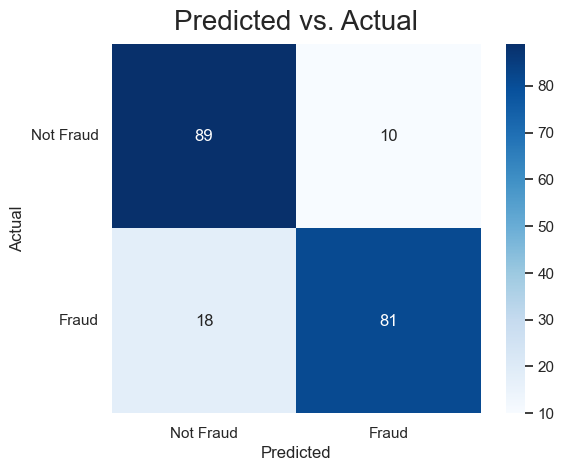

In [36]:
# Create a confusion matrix for the Naive Beyes on the validation data(0.421)
make_confusion_matrix_val(gnb_best)
plt.savefig('confusion-matrix-val-naive-beyes.png')

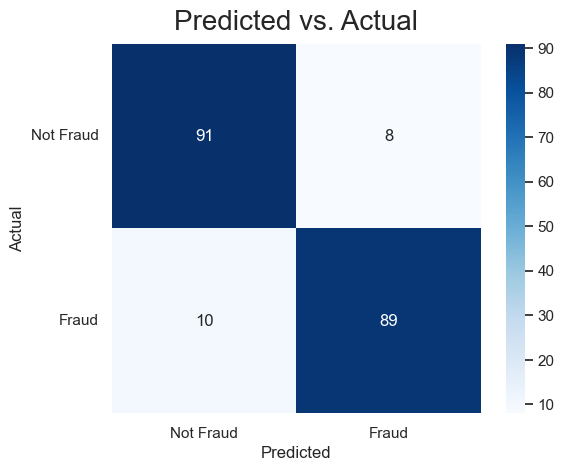

In [27]:
# Creating a confusion matrix for the Logistic Regression model on the validation data(0.842)
make_confusion_matrix_val(logistic_grid)
plt.savefig('confusion-matrix-val-logistic-regression.png')

In [31]:
def make_confusion_matrix_test(model, threshold=0.5):
    """
    Generates a confusion matrix for a given model on the test dataset, given a threshold.

    Args:
    - model: a trained machine learning model
    - threshold: threshold for binary classification

    Returns: None
    """

    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)

    # Generate confusion matrix
    fraud_confusion = confusion_matrix(y_test, y_predict)

    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])

    # Calculate TP, FP, FN, TN
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]

    # Add title, labels and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

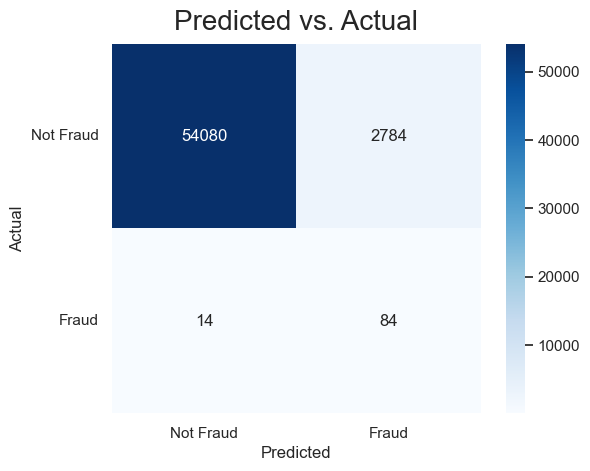

In [37]:
# Generate confusion matrix for Naive Beyes model on test dataset
make_confusion_matrix_test(gnb_best)
plt.savefig('confusion-matrix-test-naive-beyes.png')

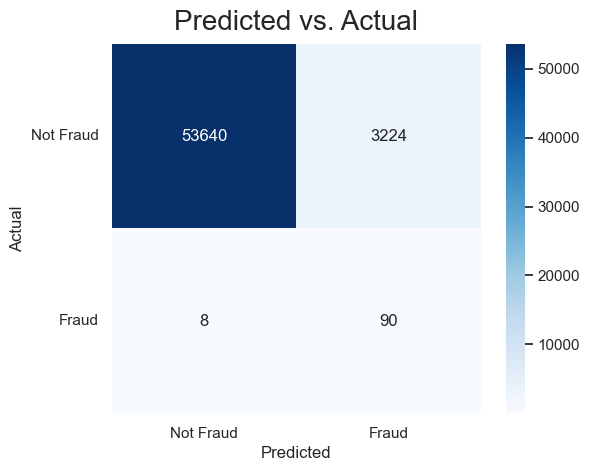

In [38]:
# Generate confusion matrix for logistic regression model on test dataset
make_confusion_matrix_test(logistic_grid)
plt.savefig('confusion-matrix-test-logistic-regression.png');